<h1>Лабораторна робота 4, варіант 5</h1>
<h2>Конобаса Ігоря, ТТП-41</h2>

$$ f(t, N, \alpha, \beta, \gamma) = \frac{\alpha N^{2}}{N + 1} - \beta N - \gamma N^{2} $$

In [141]:
import numpy as np
from scipy.integrate import ode

birth_rate = 12
death_rate = 3

intraspecific_competition = 2

ps = [birth_rate, death_rate, intraspecific_competition]

#  population growth func
def f(t, N, ps):
    return ps[0] * (N ** 2) / (N + 1) - ps[1] * N - ps[2] * (N ** 2)

def solve(N0, t0=0, t1=1, h=0.05):
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value(N0, t0).set_f_params(ps)
    
    N = [N0]
    t = [t0]
    
    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

$$ L = \frac{-\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$
$$ K = \frac{\sqrt{(\alpha - \beta - \gamma)^2 - 4\beta\gamma} - \alpha + \beta + \gamma}{-2\gamma} $$

In [142]:
num_part = ((ps[0] - ps[1] - ps[2]) ** 2 - 4*ps[1]*ps[2]) ** 0.5
L = (-num_part - ps[0] + ps[1] + ps[2]) / (-2 * ps[2])
K = (num_part - ps[0] + ps[1] + ps[2]) / (-2 * ps[2])

if K < L:
    L, K = K, L
print("Нижня межа: {}, верхня межа: {}".format(L, K))

Нижня межа: 0.5, верхня межа: 3.0


In [143]:
L, K

(0.5, 3.0)

In [144]:
options = [
    [1./4. * L, "< L/2"],
    [3./4. * L, "> L/2"],
    [L, "L"],
    [1./4. * (K + L), "< (K + L)/2"],
    [3./4. * (K + L), "> (K + L)/2"],
    [K, "K"],
    [1.25 * K, "> K"]
]

In [145]:
options

[[0.125, '< L/2'],
 [0.375, '> L/2'],
 [0.5, 'L'],
 [0.875, '< (K + L)/2'],
 [2.625, '> (K + L)/2'],
 [3.0, 'K'],
 [3.75, '> K']]

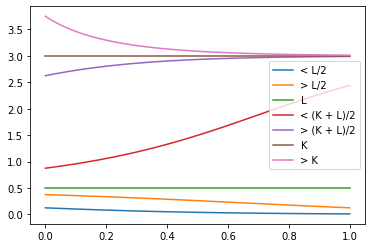

In [146]:
import matplotlib.pyplot as plt

t0 = 0
t1 = 0.5
fig, ax = plt.subplots()
lines=[]

for ind, opt in enumerate(options):
    N0 = opt[0]
    def_text = opt[1]
    N, t = solve(N0, h=0.01)
    lines.append(ax.plot(t, N, label=def_text)[0])

ax.legend(handles=lines)
plt.show()


## Задача №2

In [147]:
population_func = lambda t, N: -0.0001*N**2 + 0.125*N
initial_counts = [175, 100]
t = 20

Населення при стартовій популяції 175: 830.9863950121302
Населення при стартовій популяції 100: 643.0115627242516


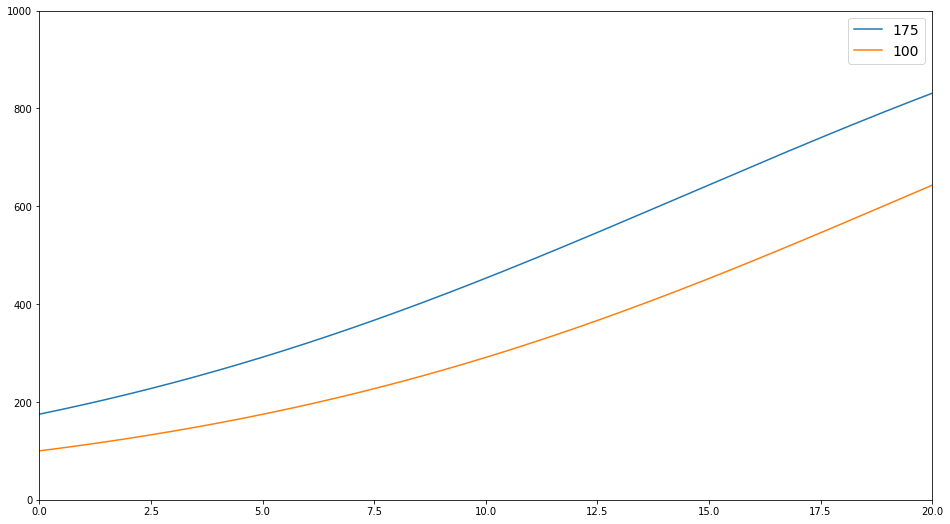

In [148]:
def solve1(N0, t0=0, t1=1, h=0.1):
    r = ode(population_func).set_integrator('dopri5').set_initial_value(N0, t0)
    N, t = [N0], [t0]
    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

plt.figure(figsize=(16, 9))
plt.axis([0, 20, 0, 1000])
for count in initial_counts:
    N, t = solve1(count, 0, 20)
    plt.plot(t, N, label=str(count))
    print("Населення при стартовій популяції {}: {}".format(count, N[-1][0]))
plt.legend(loc='best', prop={'size': 14})
plt.show() 